# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  Black-Scholes call option price is most sensitive to changes in time when **expiration is near**. This reflects the phenomenon of time decay, where the option loses value faster as it nears maturity. Over longer horizons, time sensitivity decreases, indicating that long-dated options lose value more slowly over time.
- *Call Option – Spot Price Sensitivity:*  The call option price increases as the spot price **increases**. Sensitivity is measured by **Delta**, which approaches 1 as the option becomes deep in the money, meaning the call price moves nearly one-to-one with the spot price. Near the strike price, Delta increases rapidly, showing high sensitivity. For far out-of-the-money calls, Delta approaches 0.
- *Put Option – Time Sensitivity:*  Similar to calls, put options exhibit greater time sensitivity as **expiration nears**, especially when they are at-the-money. As time to maturity decreases, the option value decays faster. However, deep in-the-money puts may retain more value for longer due to intrinsic value. Over long horizons, the rate of decay slows down.
- *Put Option – Spot Price Sensitivity:*  Put option prices increase as the spot price **decreases**. The sensitivity is negative (Delta < 0), approaching −1 for deep in-the-money puts. Around the strike price, Delta changes rapidly, indicating high sensitivity. For far out-of-the-money puts, Delta approaches 0, meaning small spot price changes have little effect.

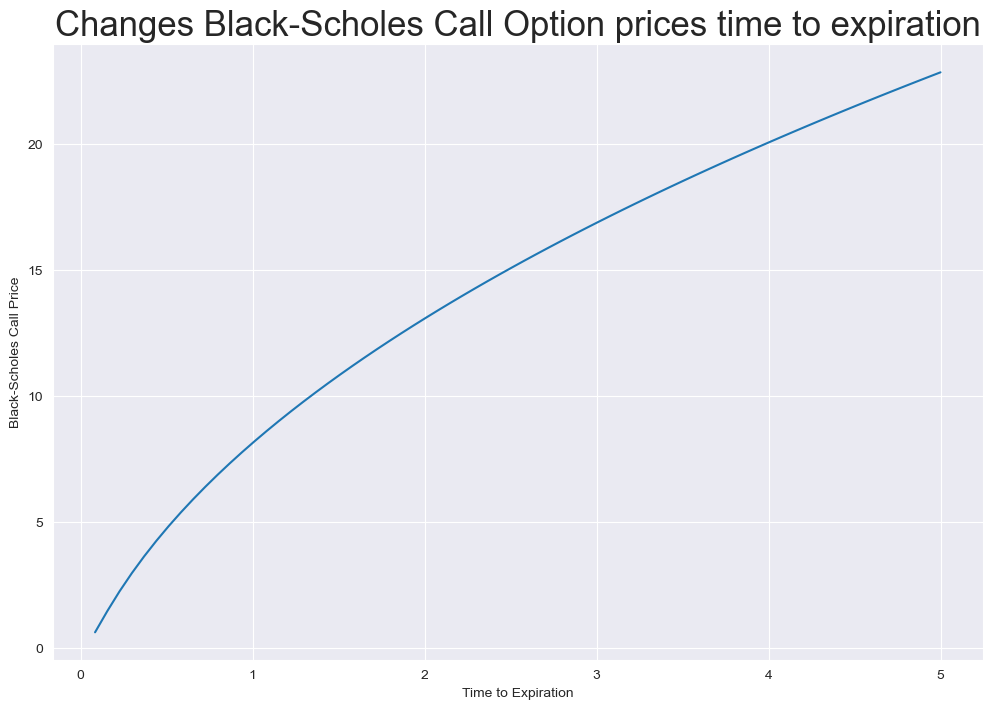

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

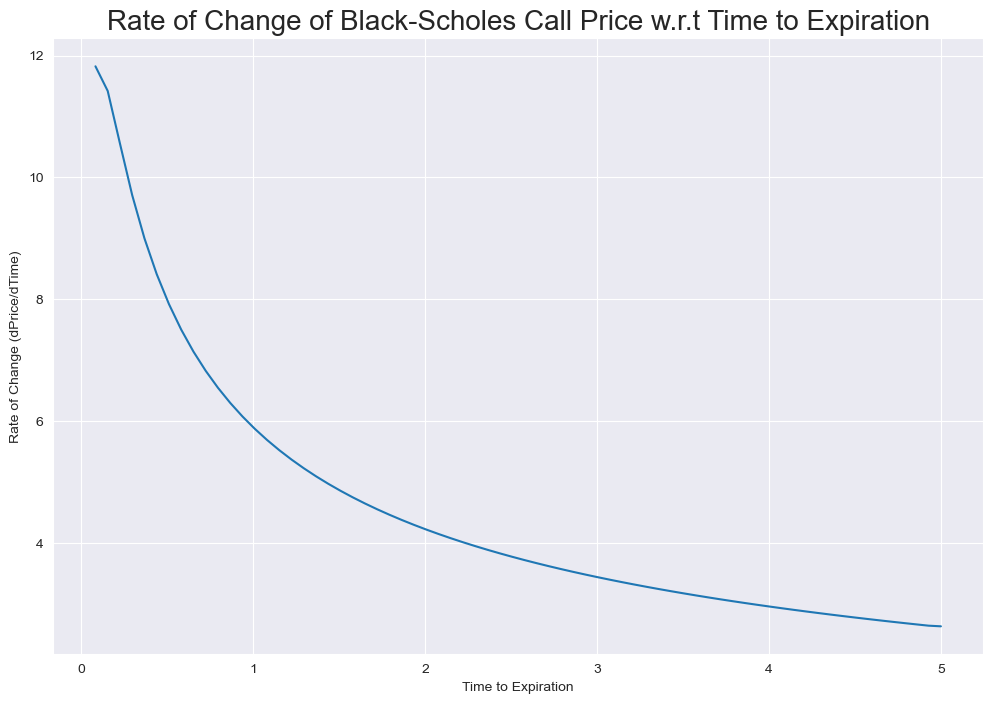

In [2]:
# Compute rate of change
call_rate_of_change = np.gradient(call_prices, times)

plt.figure(figsize=(12, 8))
plt.title('Rate of Change of Black-Scholes Call Price w.r.t Time to Expiration', size=20)
plt.plot(times, call_rate_of_change)
plt.xlabel('Time to Expiration')
plt.ylabel('Rate of Change (dPrice/dTime)')
plt.show()


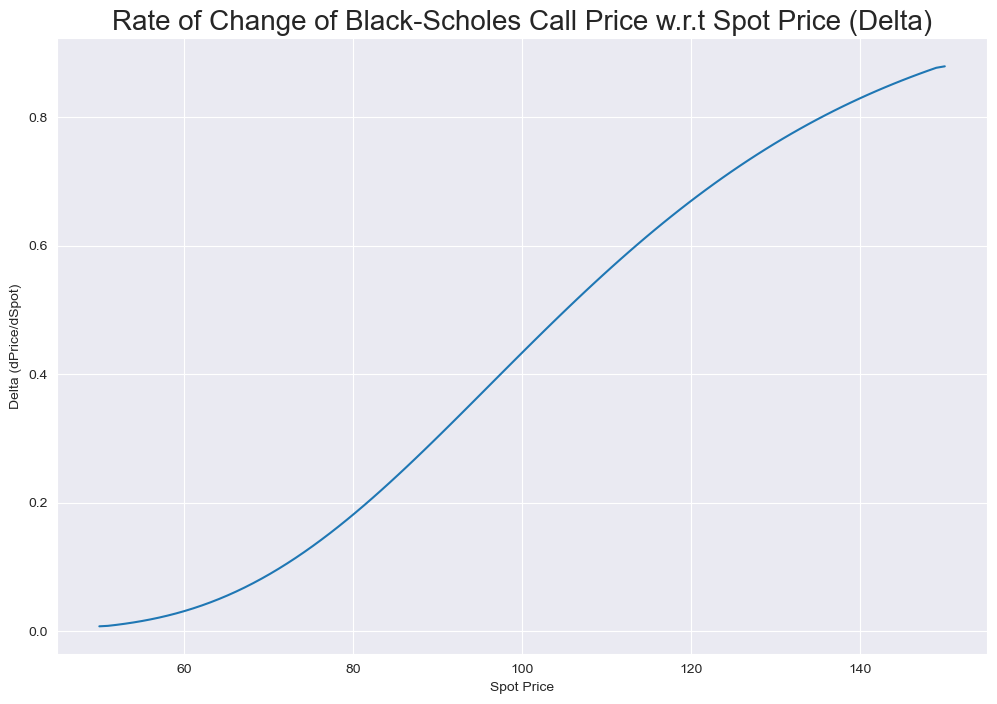

In [3]:
spot_prices = np.linspace(50, 150, 100)
call_prices_spot = [bs_call(S, K, sigma, t=1) for S in spot_prices]

# Derivative w.r.t spot price
call_delta = np.gradient(call_prices_spot, spot_prices)

plt.figure(figsize=(12, 8))
plt.title('Rate of Change of Black-Scholes Call Price w.r.t Spot Price (Delta)', size=20)
plt.plot(spot_prices, call_delta)
plt.xlabel('Spot Price')
plt.ylabel('Delta (dPrice/dSpot)')
plt.show()


### **Repeat for Put Options**

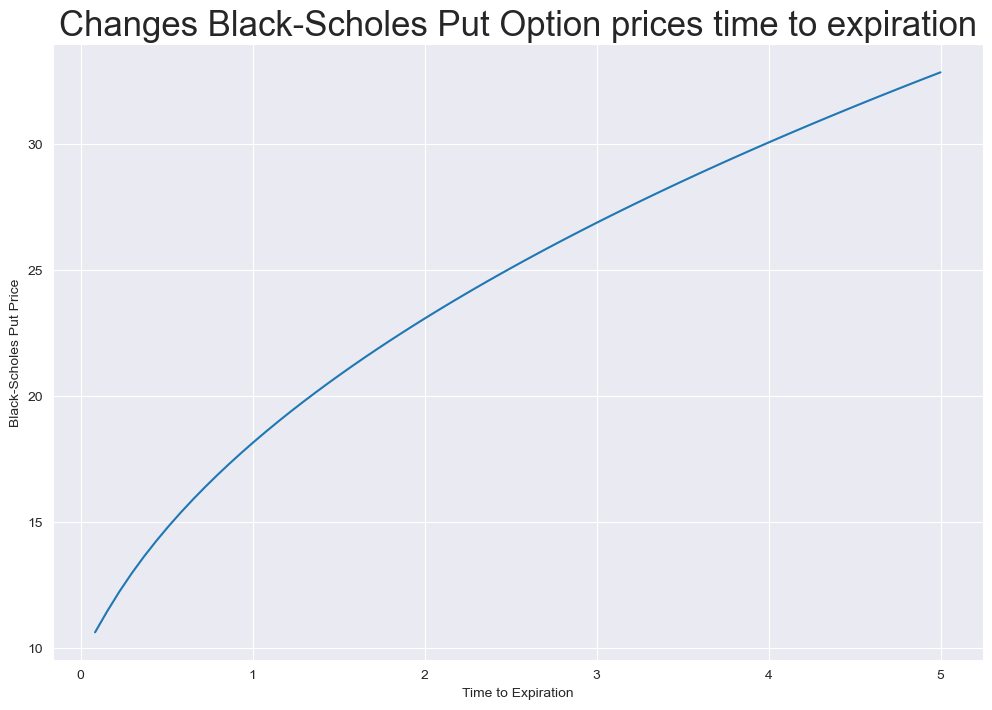

In [6]:
put_prices = [bs_put(S0, K, sigma, t=times[i]) for i in range(len(times))]
plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Put Option prices time to expiration', size = 25)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()

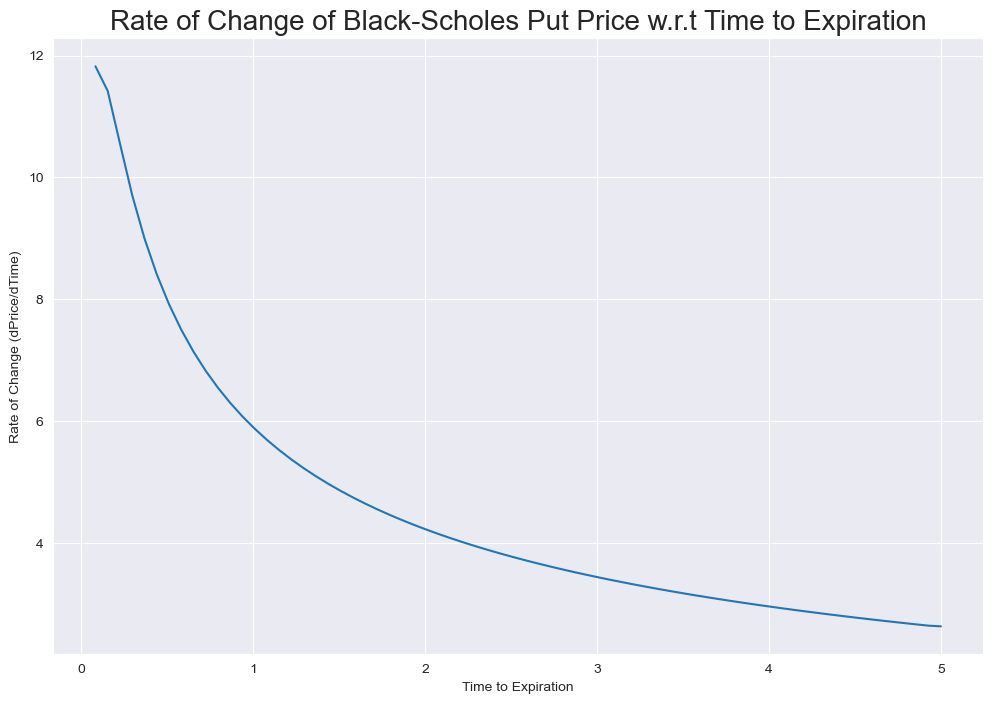

In [ ]:
put_rate_of_change = np.gradient(put_prices, times)

plt.figure(figsize=(12, 8))
plt.title('Rate of Change of Black-Scholes Put Price w.r.t Time to Expiration', size=20)
plt.plot(times, put_rate_of_change)
plt.xlabel('Time to Expiration')
plt.ylabel('Rate of Change (dPrice/dTime)')
plt.show()


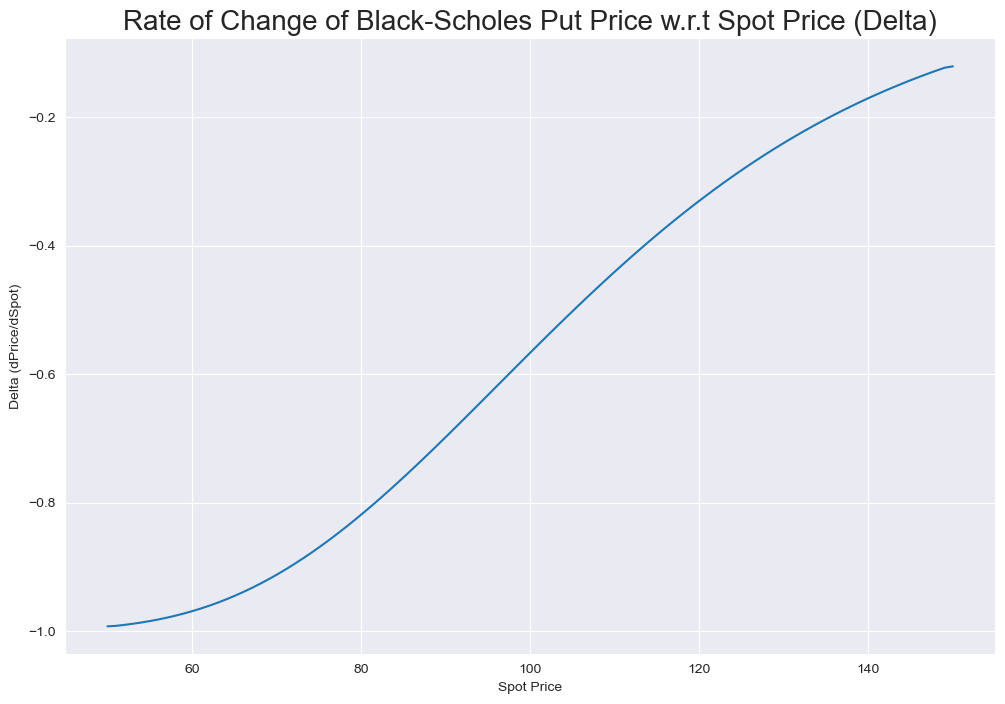

In [5]:
put_prices_spot = [bs_put(S, K, sigma, t=1) for S in spot_prices]
put_delta = np.gradient(put_prices_spot, spot_prices)

plt.figure(figsize=(12, 8))
plt.title('Rate of Change of Black-Scholes Put Price w.r.t Spot Price (Delta)', size=20)
plt.plot(spot_prices, put_delta)
plt.xlabel('Spot Price')
plt.ylabel('Delta (dPrice/dSpot)')
plt.show()
